In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def add_goal (X, Y,s, r, loc):

  delx = np.zeros_like(X)
  dely = np.zeros_like(Y)
  for i in range(len(x)):
    for j in range(len(y)):
      
      d= np.sqrt((loc[0]-X[i][j])**2 + (loc[1]-Y[i][j])**2)
      theta = np.arctan2(loc[1]-Y[i][j], loc[0] - X[i][j])
      if d< r:
        delx[i][j] = 0
        dely[i][j] =0
      elif d>r+s:
        delx[i][j] = 50* s *np.cos(theta)
        dely[i][j] = 50 * s *np.sin(theta)
      else:
        delx[i][j] = 50 * (d-r) *np.cos(theta)
        dely[i][j] = 50 * (d-r) *np.sin(theta)
  return delx, dely

In [ ]:
fac=1/20########################
x = np.arange(0,2000*fac,1)
y = np.arange(0,2000*fac,1)
s = 150*fac       ################################################################################################################################################
r = 150*fac       ################################################################################################################################################
X, Y = np.meshgrid(x,y)

def plot_graph(X, Y, delx, dely,obj, fig, ax, loc,r,i, color  ):#start_goal=np.array([[0,0]])
  
  ax.quiver(X, Y, delx, dely)
  ax.add_patch(plt.Circle(loc, r, color=color))
  ax.set_title(f'Robot path with {i} obstacles ')
  ax.annotate(obj, xy=loc, fontsize=10, ha="center")
  return ax
def add_obstacle(X, Y , delx, dely, goal , obstacle):

  for i in range(len(x)):
    for j in range(len(y)):
      
      d_goal = np.sqrt((goal[0]-X[i][j])**2 + ((goal[1]-Y[i][j]))**2)
      d_obstacle = np.sqrt((obstacle[0]-X[i][j])**2 + (obstacle[1]-Y[i][j])**2)
      theta_goal= np.arctan2(goal[1] - Y[i][j], goal[0]  - X[i][j])
      theta_obstacle = np.arctan2(obstacle[1] - Y[i][j], obstacle[0]  - X[i][j])
      if d_obstacle < r:
        delx[i][j] = -1*np.sign(np.cos(theta_obstacle))*5 +0
        dely[i][j] = -1*np.sign(np.cos(theta_obstacle))*5  +0
      elif d_obstacle>r+s:
        delx[i][j] += 0 -(50 * s *np.cos(theta_goal))
        dely[i][j] += 0 - (50 * s *np.sin(theta_goal))
      elif d_obstacle<r+s :
        delx[i][j] += -150 *(s+r-d_obstacle)* np.cos(theta_obstacle)
        dely[i][j] += -150 * (s+r-d_obstacle)*  np.sin(theta_obstacle) 
      if d_goal <r+s:
        if delx[i][j] != 0:
          delx[i][j]  += (50 * (d_goal-r) *np.cos(theta_goal))
          dely[i][j]  += (50 * (d_goal-r) *np.sin(theta_goal))
        else:
          
          delx[i][j]  = (50 * (d_goal-r) *np.cos(theta_goal))
          dely[i][j]  = (50 * (d_goal-r) *np.sin(theta_goal))
          
      if d_goal>r+s:
        if delx[i][j] != 0:
          delx[i][j] += 50* s *np.cos(theta_goal)
          dely[i][j] += 50* s *np.sin(theta_goal)
        else:
          
          delx[i][j] = 50* s *np.cos(theta_goal)
          dely[i][j] = 50* s *np.sin(theta_goal) 
      if d_goal<r:
          delx[i][j] = 0
          dely[i][j] = 0
   
  return delx, dely, obstacle, r
def path_walk(start,goals):
  global r, fac
  seek_points = np.array([[start[0]*fac , start[1]*fac]])
  goal = [goals[1]*fac , goals[2]*fac]
  obs =  [[1, 475, 475, 1], [2, 175, 925, 1], [3, 325, 625, 2], [4, 775, 775, 3], [5, 475, 175, 2]]
  obs.remove(goals) 


  delx, dely = add_goal(X, Y,s, r , goal)

  fig, ax = plt.subplots(figsize = (10,10))
  plot_graph(X, Y, delx, dely , 'Goal',fig, ax, goal, r,0, 'b' )
  for j in range(len(obs)):
    obstacle = [obs[j][1]*fac , obs[j][2]*fac]
    delx, dely, loc, r = add_obstacle(X,Y, delx,dely,goal,obstacle)
    plot_graph(X, Y, delx, dely , 'Obstacle'+ str(obs[j][0]),fig, ax, loc, r , j+1,'r')
 
  sen = ax.streamplot(X,Y,delx,dely, start_points=seek_points , linewidth=2, cmap='autu')
  sens = sen.lines.get_segments()
  # a=sens[::15]
  a=sens[:]
  a=np.array(a)
  a=a.tolist()

  b=np.array(sens[::15])
  x,y = b.T
  ax.plot(x,y,'ro')
  plt.show()
  return a


In [ ]:
obs = [[1, 475, 475, 1], [2, 175, 925, 1], [3, 325, 625, 2], [4, 775, 775, 3], [5, 475, 175, 2]]
mapid={}
for i in obs:
  mapid[i[0]]=i
def add20pixel2mm(d):
  mm = d*(200/150)/fac
  return mm

In [ ]:
def get_lasttheta(a,goals):
  xlast,ylast = a[-1][1]
  deltay = ylast - goals[2]*fac
  deltax = xlast -  goals[1]*fac 
  thetagoal = np.degrees(np.arctan(deltay/deltax))
  return thetagoal
def scan_a2b(a,start):
  b=[]
  checkstart=False
  for i in range(len(a)):
    x1,y1 = a[i][0]
    x2,y2 = a[i][1]
    if abs((x1/fac)-start[0])<=0.001 :
      checkstart=True
    if checkstart:
      b.append(a[i])
  b=b[::15]
  return b
def get_command(b , id):###########################################################################################
  input=[]
  theta1=0
  for i in range(len(b[:-1])):
    deltay = b[i+1][0][1] - b[i][0][1]
    deltax = b[i+1][0][0] - b[i][0][0]
    if deltax!=0:
      theta2 = np.degrees(np.arctan(deltay/deltax))
      reltheta = theta2-theta1
      d = add20pixel2mm(np.sqrt(deltay**2 + deltax**2))
      # print(d)
      if d > 100 :
        input.append((reltheta,d , id))#####################################################################################################################
      theta1 = theta2
  return input

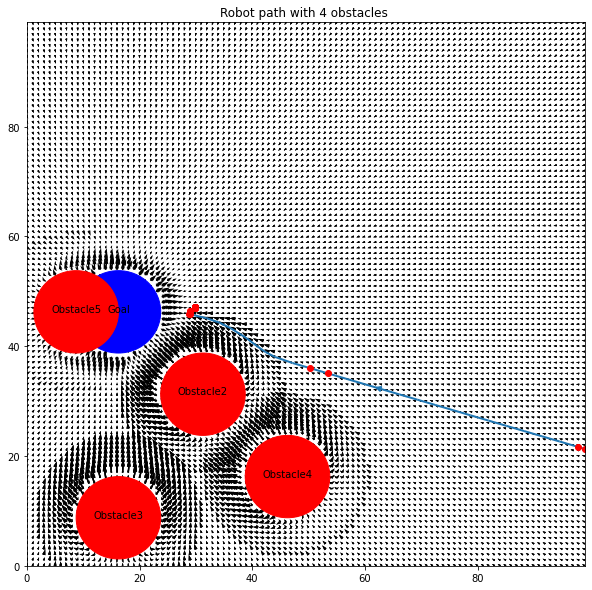

[596.1113630005849, 942.5758337651638] [2, 625, 625, 2]


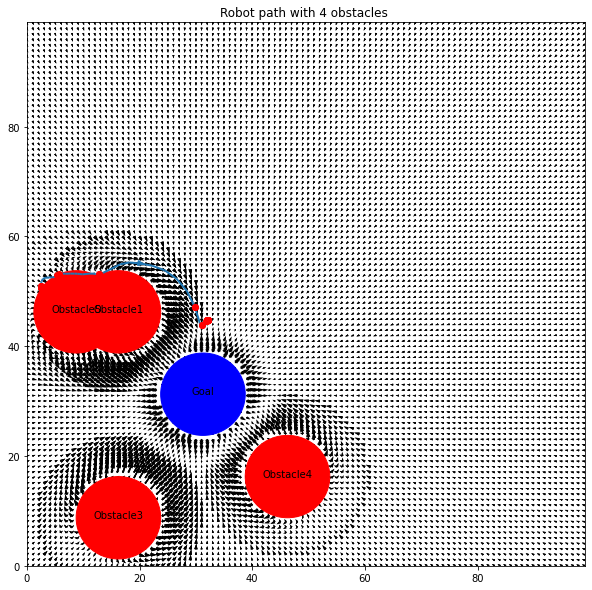

[643.0058124625305, 896.3512387918726] [3, 325, 175, 3]


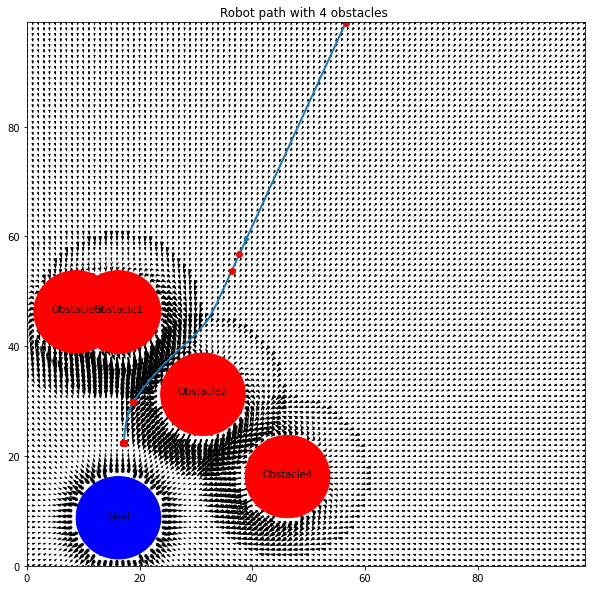

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
[342.81886646116084, 446.8470465931197] [4, 925, 325, 2]


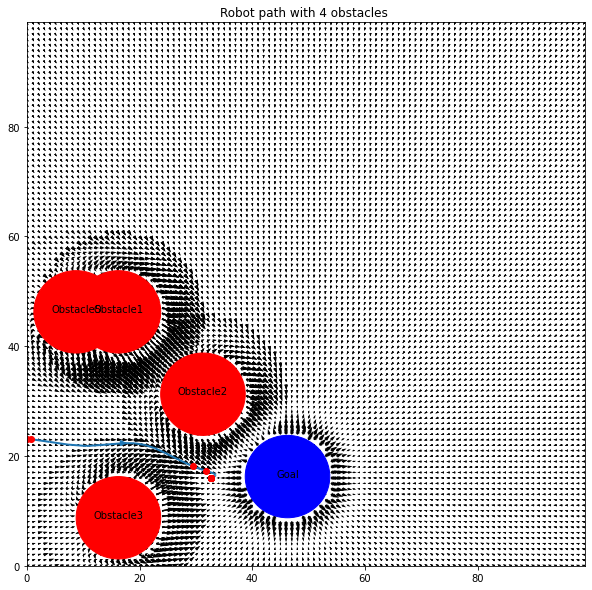

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
[652.6540091857024, 318.7838193459445] [5, 175, 925, 2]


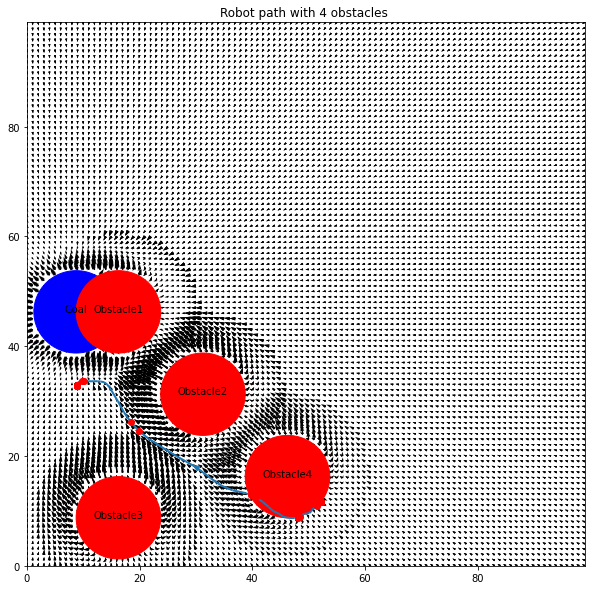

In [ ]:
inputs=[]
start = [1575, 548]#1575, 548
goals = mapid[1]
a=path_walk(start,goals) 

thetagoal = get_lasttheta(a,goals)
b=scan_a2b(a,start)
input = get_command(b)
input.append((thetagoal,0))
inputs = inputs + input

for i in range(4):
  start = [ a[-1][1][0]/fac , a[-1][1][1]/fac]
  goals = mapid[i+2]
  print(start,goals)
  a=path_walk(start,goals) 

  thetagoal = get_lasttheta(a,goals)
  b=scan_a2b(a,start)
  input = get_command(b , i)##############################################################################
  input.append((thetagoal,0))
  inputs = inputs + input


In [ ]:
inputs

[(-16.78386559548136, 879.9772273665396, 1),
 (-9.69473513600553, 521.417098402472, 1),
 (3.709228082098717, 0),
 (86.20364042330279, 0),
 (137.56482711073178, 474.6665917183592, 3),
 (114.58281646643417, 251.38694722960565, 3),
 (86.24977551539786, 0),
 (70.96920899913687, 415.41887254206176, 4),
 (1.3075246151775248, 0),
 (-35.70229711758588, 464.7581513382381, 5),
 (-12.447434176587159, 268.5352787103294, 5),
 (-89.01953571655693, 0)]

In [ ]:
mq=[]
for i,com in enumerate(inputs):
  if abs(com[0])>=3:
    mq.append('tx,'+str(round(com[0])))
  if com[1]>0:
    mq.append('fx,'+str(round(com[1])))
  mq.append('sx,'+str(1))

In [ ]:
print(mq)

['tx,5', 'fx,1078', 'tx,-4', 'tx,-52', 'fx,701', 'tx,-79', 'fx,114', 'tx,55', 'tx,-20', 'tx,-82', 'fx,502', 'tx,-23', 'fx,125', 'fx,120', 'tx,23']


In [ ]:
{"jd":"20","nav":["tx,4.6","fx,1077","sx,6,3" , "tx,356.4","sx,6,3" , "tx,307.6","fx,701","sx,6,3" , 
                  "tx,282","fx,114.2","sx,6,3" , "tx,54.8","sx,6,3" , "tx,340.4","sx,6,3" , "tx,278.2","fx,501.6","sx,6,3"
                  "tx,337.2","fx,125.1","sx,6,3" , "fx,119.7","sx,6,3" , "tx,23.4","sx,6,3"]}
